In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mydataraw = pd.read_csv("oilpriceindex.csv")

In [3]:
mydataraw.head(10)

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,16.880,0.44
1,02-01-1990,22.11,19.81,16.960,2.45
2,03-01-1990,NaN,18.39,NaN,-0.28
3,04-01-1990,18.43,16.61,17.300,-6.18
4,05-01-1990,18.20,16.35,17.378,-1.62
5,06-01-1990,16.70,15.10,17.489,-3.48
6,07-01-1990,18.45,17.17,17.393,-1.02
7,08-01-1990,27.31,NaN,17.552,3.29
8,09-01-1990,33.51,34.90,18.080,-3.48
9,10-01-1990,36.04,36.02,18.157,3.35


In [5]:
mydataraw.tail()

,DATE,WTI,BRENT,INR,NIFTY
371,12-01-2020,55.53,65.01,74.025,0.066
372,01-01-2021,58.42,58.61,73.100,0.011
373,02-01-2021,57.30,53.20,72.918,-0.004
374,03-01-2021,54.18,57.79,73.585,0.065
375,04-01-2021,55.06,59.39,73.169,0.007


In [4]:
mydataraw.describe()

,WTI,BRENT,INR,NIFTY
count,375.000000,374.000000,374.000000,373.000000
mean,48.180373,49.824091,47.144032,0.188386
std,28.655558,32.294558,14.049648,1.852366
min,11.350000,9.820000,16.880000,-6.180000
25%,21.370000,19.875000,38.592500,-0.740000
50%,44.900000,44.620000,45.757500,0.160000
75%,65.920000,69.500000,58.460000,1.010000
max,133.880000,132.720000,75.525000,17.740000


In [7]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      2
NIFTY    3
dtype: int64

In [15]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [16]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,16.880,0.44
1990-02-01,22.11,19.81,16.960,2.45
1990-03-01,NaN,18.39,NaN,-0.28
1990-04-01,18.43,16.61,17.300,-6.18
1990-05-01,18.20,16.35,17.378,-1.62


In [10]:
mydataraw.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,16.880,0.44
1,02-01-1990,22.11,19.81,16.960,2.45
2,03-01-1990,NaN,18.39,NaN,-0.28
3,04-01-1990,18.43,16.61,17.300,-6.18
4,05-01-1990,18.20,16.35,17.378,-1.62


In [17]:
mydatats.WTI = mydatats.WTI.fillna(method="ffill")

In [19]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,16.880,0.44
1990-02-01,22.11,19.81,16.960,2.45
1990-03-01,22.11,18.39,NaN,-0.28
1990-04-01,18.43,16.61,17.300,-6.18
1990-05-01,18.20,16.35,17.378,-1.62


In [20]:
mydatats.INR = mydatats.INR.fillna(method="bfill")

In [21]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,16.880,0.44
1990-02-01,22.11,19.81,16.960,2.45
1990-03-01,22.11,18.39,17.300,-0.28
1990-04-01,18.43,16.61,17.300,-6.18
1990-05-01,18.20,16.35,17.378,-1.62


In [23]:
mydatats.BRENT = mydatats.BRENT.fillna(method="bfill")

In [24]:
mydatats= mydatats.fillna(method="bfill")

In [25]:
mydatats.isna().sum()

WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

**Data Visualization**

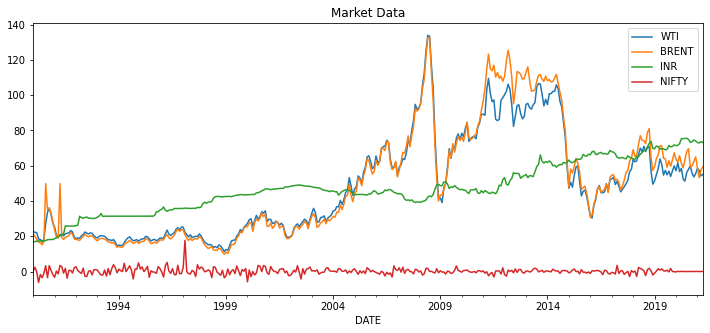

In [26]:
mydatats.plot(figsize=(12,5), title = "Market Data")
plt.show()

**White Noise and Stationary of a time series Data**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import seaborn as sns
sns.set()

**Duplicate Variables**

In [28]:
mydatats ["INR_INR"]= mydatats.INR

In [31]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,16.880,0.44
1990-02-01,22.11,19.81,16.960,2.45
1990-03-01,22.11,18.39,17.300,-0.28
1990-04-01,18.43,16.61,17.300,-6.18
1990-05-01,18.20,16.35,17.378,-1.62


In [30]:
del mydatats["INR_INR"]

**Splitting the dataset**

In [32]:
len(mydatats)

376

In [33]:
 size = int(len(mydatats)*0.7)
 mydatats_train = mydatats.iloc[:size]
 mydatats_test = mydatats.iloc[size:]

In [34]:
len(mydatats), len(mydatats_train), len(mydatats_test)

(376, 263, 113)

**White Noise In Time series Modeling**

In [38]:
white_noise = np.random.normal(loc = mydatats.INR.mean(), scale = mydatats.INR.std(), size = len(mydatats))

In [40]:
 mydatats [ "WN_INR"]= white_noise

In [41]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,16.880,0.44,38.516376
1990-02-01,22.11,19.81,16.960,2.45,49.208324
1990-03-01,22.11,18.39,17.300,-0.28,29.637180
1990-04-01,18.43,16.61,17.300,-6.18,32.996688
1990-05-01,18.20,16.35,17.378,-1.62,58.151089


In [43]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,WN_INR
count,376.000000,376.000000,376.000000,376.000000,376.000000
mean,48.111037,49.824091,47.007894,0.177202,47.293732
std,28.648890,32.208324,14.138997,1.854919,14.271041
min,11.350000,9.820000,16.880000,-6.180000,11.494378
25%,21.385000,19.885000,36.593750,-0.742500,36.858611
50%,44.810000,44.840000,45.747500,0.153500,46.674227
75%,65.755000,69.220000,57.160000,1.020000,56.124087
max,133.880000,132.720000,75.525000,17.740000,90.057971


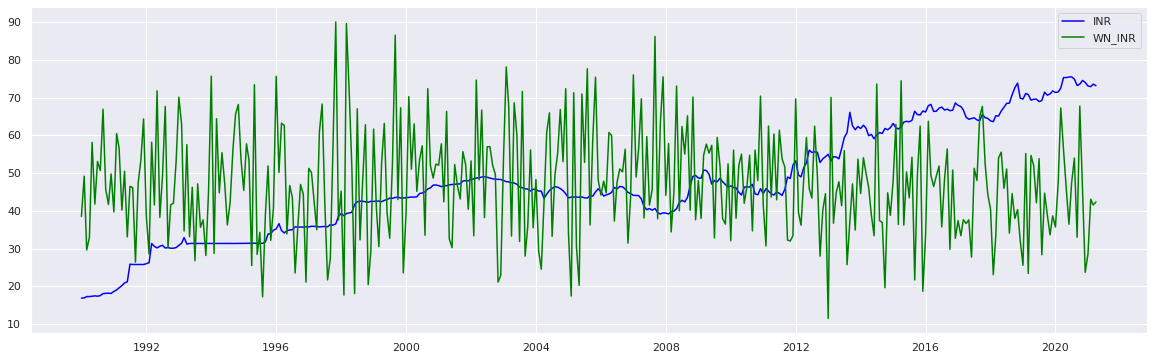

In [46]:
plt.figure(figsize = (20,6))
plt.plot(mydatats.INR, color= "blue", label = "INR")

plt.plot(mydatats.WN_INR, color= "green", label = "WN_INR")
plt.legend(loc = "best")
plt.show()



**percentage Change**

(Yt - Yt-1)/Yt-1

In [47]:
mydatats["INR_pct"] = mydatats.INR.pct_change(1).mul(100)

In [48]:
mydatats["INR_diff"] = mydatats.INR.diff().dropna()

In [50]:
mydatats = mydatats.fillna(method="bfill")

In [51]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff
DATE,,,,,,,
1990-01-01,22.86,21.25,16.880,0.44,38.516376,0.473934,0.080
1990-02-01,22.11,19.81,16.960,2.45,49.208324,0.473934,0.080
1990-03-01,22.11,18.39,17.300,-0.28,29.637180,2.004717,0.340
1990-04-01,18.43,16.61,17.300,-6.18,32.996688,0.000000,0.000
1990-05-01,18.20,16.35,17.378,-1.62,58.151089,0.450867,0.078


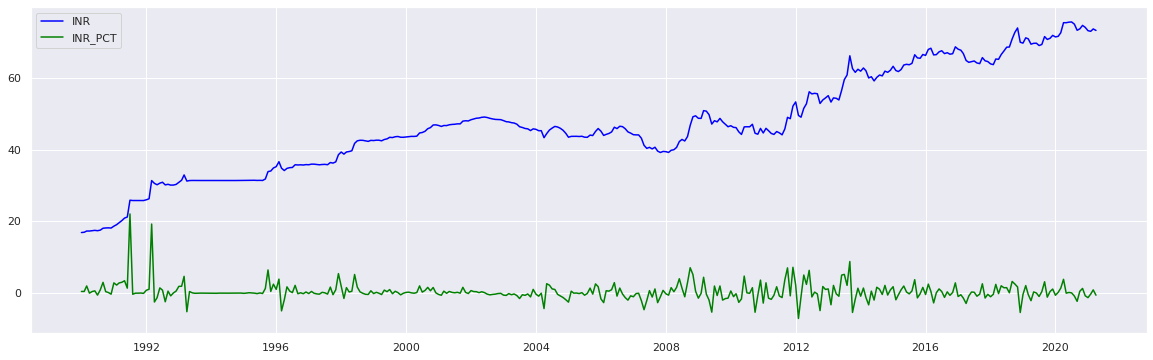

In [52]:
plt.figure(figsize = (20,6))
plt.plot(mydatats.INR, color= "blue", label = "INR")

plt.plot(mydatats.INR_pct, color= "green", label = "INR_PCT")
plt.legend(loc = "best")
plt.show()

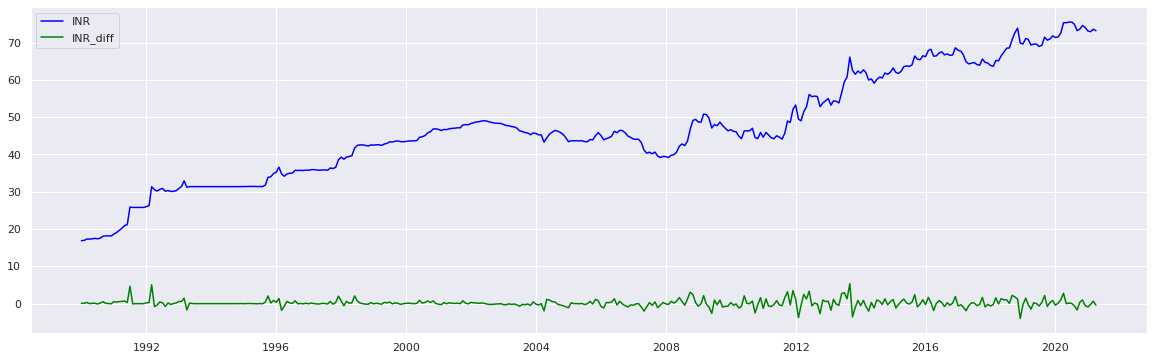

In [53]:
plt.figure(figsize = (20,6))
plt.plot(mydatats.INR, color= "blue", label = "INR")

plt.plot(mydatats.INR_diff, color= "green", label = "INR_diff")
plt.legend(loc = "best")
plt.show()

**ACF and PACF**

In [54]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff
DATE,,,,,,,
1990-01-01,22.86,21.25,16.880,0.44,38.516376,0.473934,0.080
1990-02-01,22.11,19.81,16.960,2.45,49.208324,0.473934,0.080
1990-03-01,22.11,18.39,17.300,-0.28,29.637180,2.004717,0.340
1990-04-01,18.43,16.61,17.300,-6.18,32.996688,0.000000,0.000
1990-05-01,18.20,16.35,17.378,-1.62,58.151089,0.450867,0.078


In [55]:
import statsmodels.graphics.tsaplots as sgt

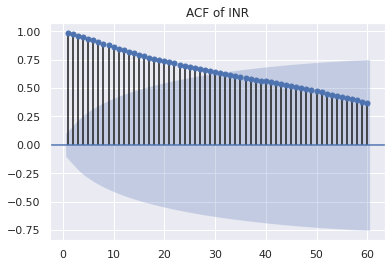

In [57]:
sgt.plot_acf(mydatats.INR, lags=60, zero = False)
plt.title("ACF of INR")
plt.show()

100, 105, 110, 110

100, 0.05, 0.06

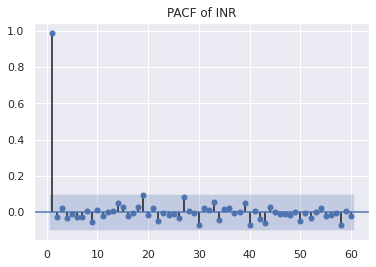

In [58]:
sgt.plot_pacf(mydatats.INR, lags=60, zero = False)
plt.title("PACF of INR")
plt.show()

This is natutal feature of a non-stationary time series

A time series is non-stationary, when its mean and variance isnot time invariant

ACF: to find order of lags of MA
PACF: To find order of AR

Yt = a + bYt-1 + Et.................  AR(1)
Yt = a + bYt-1 + b2Yt-2 + Et.................  AR(2)

Yt = a + BEt-1 + et.................  MA(1)
Yt = a + BEt-1 + BEt-2 + et.................  MA(2)

Yt = a + bYt-1 + b2Yt-2 + BEt-1 + Et    ARMA(2,1)

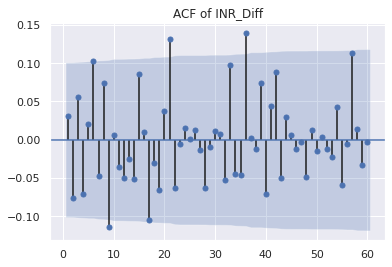

In [59]:
sgt.plot_acf(mydatats.INR_diff, lags=60, zero = False)
plt.title("ACF of INR_Diff")
plt.show()

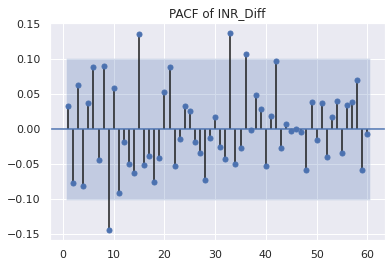

In [60]:
sgt.plot_pacf(mydatats.INR_diff, lags=60, zero = False)
plt.title("PACF of INR_Diff")
plt.show()

**Test of Stationarity(ADF)**

In [61]:
import statsmodels.tsa.stattools as sts

D: if Estimated value in ABS is greater than tabulated valye then reject the NULL 

Null: INR In Non Stationary

In [66]:
sts.adfuller(mydatats.WN_INR)

(-20.864158029670172,
 0.0,
 0,
 375,
 {'1%': -3.447909006729481,
  '10%': -2.5708923751111112,
  '5%': -2.8692783343881483},
 2929.225604326068)

**Univariate Time Series Model: AR**

In [68]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [70]:
ret_ar1 = ARMA(mydatats.INR_diff, order=(1,0))
result_ret_ar1 = ret_ar1.fit()
print(result_ret_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  376
Model:                     ARMA(1, 0)   Log Likelihood                -544.288
Method:                       css-mle   S.D. of innovations              1.029
Date:                Sat, 26 Jun 2021   AIC                           1094.576
Time:                        09:39:26   BIC                           1106.364
Sample:                    01-01-1990   HQIC                          1099.255
                         - 04-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1499      0.055      2.735      0.007       0.042       0.257
ar.L1.INR_diff     0.0316      0.051      0.613      0.540      -0.069       0.133
                                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
ret_ar2 = ARMA(mydatats.INR_diff, order=(2,0))
result_ret_ar2 = ret_ar2.fit()
print(result_ret_ar2.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  376
Model:                     ARMA(2, 0)   Log Likelihood                -543.162
Method:                       css-mle   S.D. of innovations              1.026
Date:                Sat, 26 Jun 2021   AIC                           1094.324
Time:                        09:41:01   BIC                           1110.042
Sample:                    01-01-1990   HQIC                          1100.563
                         - 04-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1499      0.051      2.954      0.003       0.050       0.249
ar.L1.INR_diff     0.0341      0.051      0.663      0.508      -0.067       0.135
ar.L2.INR_diff    -0.0771      0.051

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [72]:
ret_ar8 = ARMA(mydatats.INR_diff, order=(8,0))
result_ret_ar8 = ret_ar8.fit()
print(result_ret_ar8.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  376
Model:                     ARMA(8, 0)   Log Likelihood                -537.793
Method:                       css-mle   S.D. of innovations              1.011
Date:                Sat, 26 Jun 2021   AIC                           1095.586
Time:                        09:42:09   BIC                           1134.882
Sample:                    01-01-1990   HQIC                          1111.185
                         - 04-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1489      0.059      2.542      0.011       0.034       0.264
ar.L1.INR_diff     0.0513      0.051      1.000      0.318      -0.049       0.152
ar.L2.INR_diff    -0.0872      0.051

In [81]:
print("AIC of AR1 = ", result_ret_ar1.aic)
print("AIC of AR2 = ", result_ret_ar2.aic)
print("AIC of AR8 = ", result_ret_ar8.aic)
print("AIC of MA8 = ", result_ret_ma8.aic)

AIC of AR1 =  1094.5756327561735
AIC of AR2 =  1094.3238451004067
AIC of AR8 =  1095.5859792003448
AIC of MA8 =  1086.5750104162676


AR: I can go up to 8th Lag

**MA**

In [74]:
ret_ma2 = ARMA(mydatats.INR_diff, order=(0,2))
result_ret_ma2 = ret_ma2.fit()
print(result_ret_ma2.summary())

                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  376
Model:                     ARMA(0, 2)   Log Likelihood                -542.818
Method:                       css-mle   S.D. of innovations              1.025
Date:                Sat, 26 Jun 2021   AIC                           1093.636
Time:                        10:13:41   BIC                           1109.354
Sample:                    01-01-1990   HQIC                          1099.876
                         - 04-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1499      0.050      2.971      0.003       0.051       0.249
ma.L1.INR_diff     0.0466      0.052      0.901      0.368      -0.055       0.148
ma.L2.INR_diff    -0.0925      0.053

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [76]:
ret_ma8 = ARMA(mydatats.INR_diff, order=(0,8))
result_ret_ma8 = ret_ma8.fit()
print(result_ret_ma8.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               INR_diff   No. Observations:                  376
Model:                     ARMA(0, 8)   Log Likelihood                -533.288
Method:                       css-mle   S.D. of innovations              0.999
Date:                Sat, 26 Jun 2021   AIC                           1086.575
Time:                        10:16:45   BIC                           1125.871
Sample:                    01-01-1990   HQIC                          1102.174
                         - 04-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1487      0.061      2.429      0.016       0.029       0.269
ma.L1.INR_diff     0.0967      0.052      1.867      0.063      -0.005       0.198
ma.L2.INR_diff    -0.1166      0.052

AR(8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


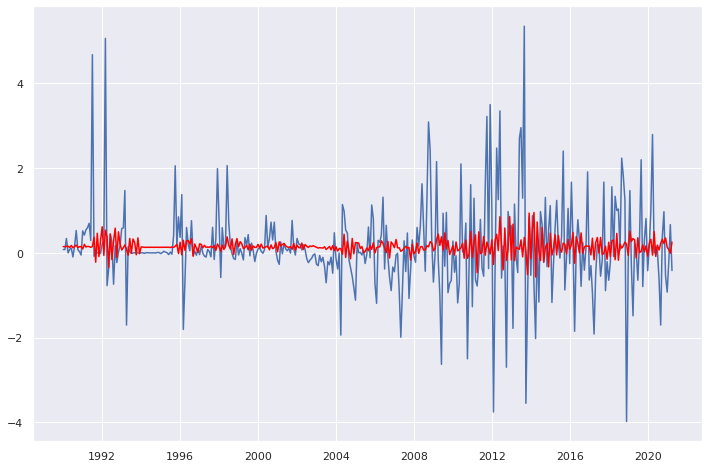

In [78]:
ret_ar8 = ARMA(mydatats.INR_diff, order=(8,0))
result_ret_ar8 = ret_ar8.fit()

plt.figure(figsize=(12,8))
plt.plot(mydatats.INR_diff)
plt.plot(result_ret_ar8.fittedvalues, color = "red")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


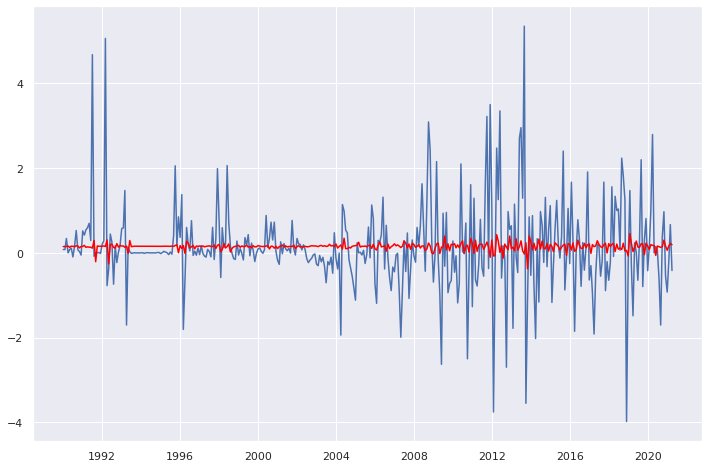

In [79]:
ret_ar2 = ARMA(mydatats.INR_diff, order=(2,0))
result_ret_ar2 = ret_ar2.fit()

plt.figure(figsize=(12,8))
plt.plot(mydatats.INR_diff)
plt.plot(result_ret_ar2.fittedvalues, color = "red")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


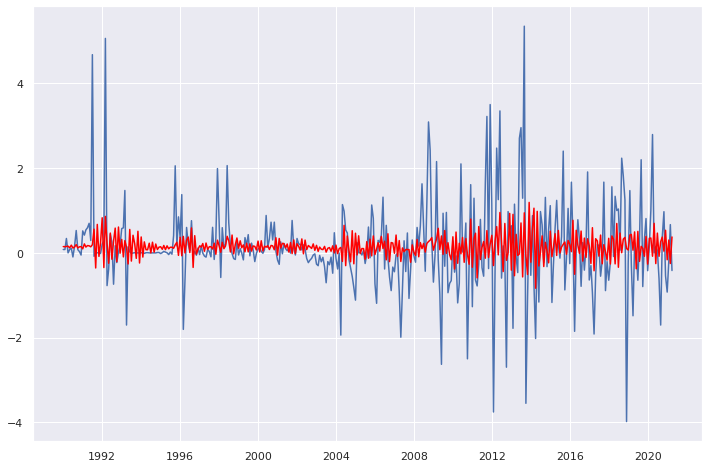

In [80]:
ret_ma8 = ARMA(mydatats.INR_diff, order=(0,8))
result_ret_ma8 = ret_ma8.fit()

plt.figure(figsize=(12,8))
plt.plot(mydatats.INR_diff)
plt.plot(result_ret_ma8.fittedvalues, color = "red")
plt.show()

**Forecasting for Future**

In [82]:
mydatats.tail()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_diff
DATE,,,,,,,
2020-12-01,55.53,65.01,74.025,0.066,23.734544,-0.726863,-0.542
2021-01-01,58.42,58.61,73.100,0.011,28.569715,-1.249578,-0.925
2021-02-01,57.30,53.20,72.918,-0.004,43.090652,-0.248974,-0.182
2021-03-01,54.18,57.79,73.585,0.065,41.576522,0.914726,0.667
2021-04-01,55.06,59.39,73.169,0.007,42.359374,-0.565333,-0.416


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


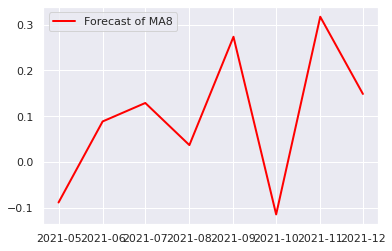

In [83]:
ret_ma8 = ARMA(mydatats.INR_diff, order=(0,8))
result_ret_ma8 = ret_ma8.fit()

fcast_ma8 = result_ret_ma8.predict(start="05/01/2021", end= "12/01/2021")
plt.plot(fcast_ma8, color = "red", linewidth = 2, label = "Forecast of MA8")
plt.legend()
plt.show()

In [84]:
fcast_ma8

2021-05-01   -0.088446
2021-06-01    0.088578
2021-07-01    0.128922
2021-08-01    0.036942
2021-09-01    0.273562
2021-10-01   -0.114489
2021-11-01    0.317307
2021-12-01    0.148681
Freq: MS, dtype: float64

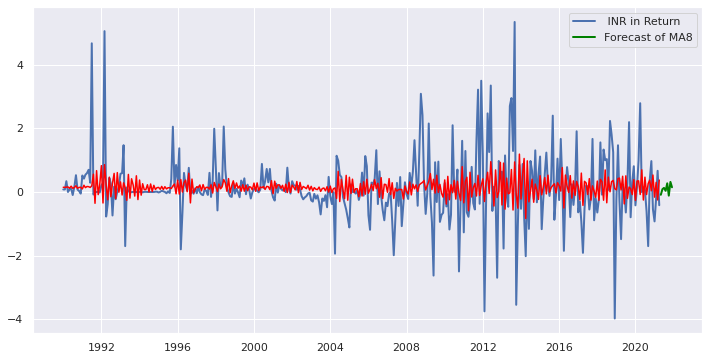

In [87]:
plt.figure(figsize=(12,6))
plt.plot(mydatats.INR_diff, linewidth = 2, label = " INR in Return")
plt.plot(result_ret_ma8.fittedvalues, color = "red")
plt.plot(fcast_ma8, color = "green", linewidth = 2, label = "Forecast of MA8")
plt.legend()
plt.show()